# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.0
-0.001
-0.001
-0.001
-0.002
0.001
-0.002
-0.002
-0.002
1.001
1.001
0.999
1.0
2.0
1.999
1.998
1.998
2.991
2.994
2.998
2.996
2.997
3.993
3.993
3.992
3.992
4.992
4.991
4.989
4.989
5.987
5.99
5.992
5.991
5.991
6.679
6.681
6.682
6.681
6.682
7.372
7.372
7.372
7.372
8.368
8.371
8.373
8.371
8.371
9.372
9.372
9.37
9.371
10.367
10.369
10.372
10.37
10.37
11.365
11.371
11.371
11.369
11.37
12.364
12.367
12.37
12.369
12.368
13.368
13.368
13.367
13.367
14.175
14.18
14.18
14.178
14.179
14.986
14.989
14.991
14.99
14.99
15.988
15.988
15.987
15.987
16.985
16.985
16.984
16.984
16.984
17.981
17.98
17.981
18.978
18.978
18.978
18.977
18.977
19.974
19.972
19.972
20.971
20.97
20.968
20.968
21.749
21.749
21.748
21.748
22.527
22.526
22.526
22.526
23.526
23.526
23.525
23.525
24.527
24.526
24.525
24.525
25.527
25.527
25.525
25.525
26.527
26.526
26.525
26.525
27.5

57.76
57.759
57.759
57.759
57.759
57.759
57.759
57.759
57.758
57.758
57.758
57.757
57.757
57.757
57.757
57.757
57.757
57.757
57.757
57.758
57.758
57.758
57.758
57.756
57.756
57.755
57.755
57.779
57.804
57.831
57.909
57.934
57.96
57.96
57.976
57.976
57.976
57.976
57.976
57.975
57.975
57.975
57.974
57.973
57.973
57.973
57.973
57.974
57.974
57.975
57.974
57.974
57.971
57.972
57.972
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.97
57.969
57.969
57.969
57.969
57.969
57.968
57.968
57.969
57.969
57.969
57.969
57.969
57.967
57.967
57.967
57.967
57.967
58.066
58.14
58.191
58.191
58.19
58.19
58.19
58.206
58.205
58.205
58.205
58.205
58.204
58.204
58.204
58.204
58.204
58.203
58.202
58.205
58.205
58.205
58.204
58.203
58.202
58.202
58.201
58.201
58.201
58.201
58.201
58.201
58.201
58.201
58.2
58.2
58.2
58.2
58.2
58.199
58.199
58.199
58.199
58.199
58.198
58.198
58.198
58.198
58.198
58.198
58.198
58.198
58.198
58.196
58.196
58.196
58.196
58.196
58.363
58.389
58.459
58

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1507,3014,60.404
1508,3016,60.403
1509,3018,60.403
1510,3020,60.403


<IPython.core.display.Javascript object>


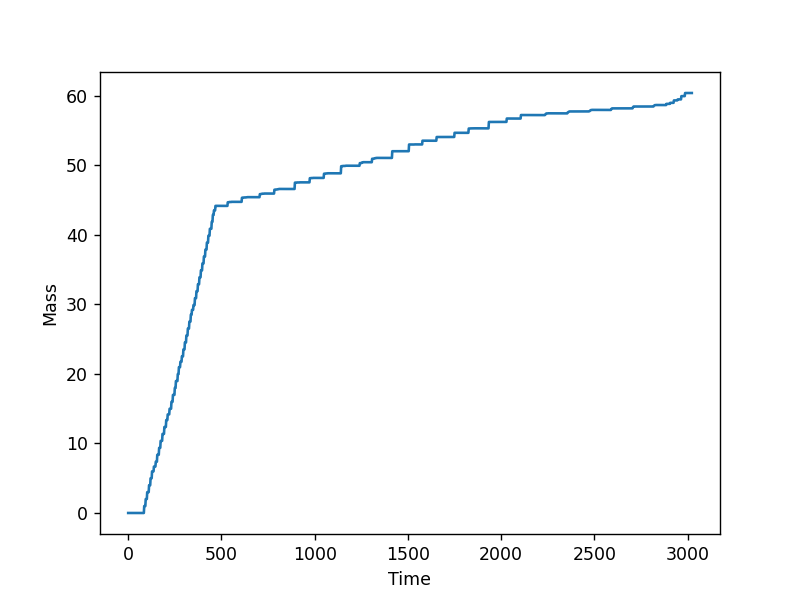

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_310323_S247-252.csv')